Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize #to resize all image
from skimage.io import imread #to read image
import os #used to list files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.preprocessing import image



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Retrieve a list of all the files and directories into a directory





In [ ]:
os.listdir('/content/drive/MyDrive/main_project/Brain_tumor_detection')
['Testing', 'Training']
os.listdir('/content/drive/MyDrive/main_project/Brain_tumor_detection/Testing')
['glioma', 'meningioma', 'notumor', 'pituitary']
os.listdir('/content/drive/MyDrive/main_project/Brain_tumor_detection/Training')
['glioma', 'meningioma', 'notumor', 'pituitary']
os.listdir('/content/drive/MyDrive/main_project/Brain_tumor_detection/Testing/glioma_tumor')

['image(100).jpg',
 'image(12).jpg',
 'image(11).jpg',
 'image(1).jpg',
 'image(15).jpg',
 'image(16).jpg',
 'image(18).jpg',
 'image(13).jpg',
 'image(19).jpg',
 'image(2).jpg',
 'image(14).jpg',
 'image(17).jpg',
 'image(10).jpg',
 'image(42).jpg',
 'image(66).jpg',
 'image(31).jpg',
 'image(84).jpg',
 'image(22).jpg',
 'image(58).jpg',
 'image(4).jpg',
 'image(7).jpg',
 'image(70).jpg',
 'image(83).jpg',
 'image(53).jpg',
 'image(94).jpg',
 'image(72).jpg',
 'image(50).jpg',
 'image(49).jpg',
 'image(55).jpg',
 'image(86).jpg',
 'image(23).jpg',
 'image(48).jpg',
 'image(25).jpg',
 'image(71).jpg',
 'image(59).jpg',
 'image(98).jpg',
 'image(89).jpg',
 'image(73).jpg',
 'image(46).jpg',
 'image(8).jpg',
 'image(69).jpg',
 'image(74).jpg',
 'image(60).jpg',
 'image(78).jpg',
 'image(47).jpg',
 'image(40).jpg',
 'image(63).jpg',
 'image(54).jpg',
 'image(57).jpg',
 'image(79).jpg',
 'image(64).jpg',
 'image(34).jpg',
 'image(91).jpg',
 'image(62).jpg',
 'image(37).jpg',
 'image(80).jp

Joins one or more path components together into a single path

In [ ]:
#training
glioma_path=os.path.join('/content/drive/MyDrive/main_project/Brain_tumor_detection/Training','glioma_tumor')
meningioma_path=os.path.join('/content/drive/MyDrive/main_project/Brain_tumor_detection/Training','meningioma_tumor')
notumor_path=os.path.join('/content/drive/MyDrive/main_project/Brain_tumor_detection/Training','no_tumor')
pitutary_path=os.path.join('/content/drive/MyDrive/main_project/Brain_tumor_detection/Training','pituitary_tumor')

In [ ]:
for i in os.listdir(glioma_path):
 print(i)

gg (19).jpg
gg (16).jpg
gg (124).jpg
gg (229).jpg
gg (300).jpg
gg (203).jpg
gg (337).jpg
gg (102).jpg
gg (370).jpg
gg (541).jpg
gg (532).jpg
gg (134).jpg
gg (486).jpg
gg (276).jpg
gg (343).jpg
gg (298).jpg
gg (513).jpg
gg (275).jpg
gg (249).jpg
gg (59).jpg
gg (157).jpg
gg (334).jpg
gg (105).jpg
gg (354).jpg
gg (272).jpg
gg (391).jpg
gg (390).jpg
gg (165).jpg
gg (252).jpg
gg (164).jpg
gg (171).jpg
gg (30).jpg
gg (168).jpg
gg (358).jpg
gg (110).jpg
gg (631).jpg
gg (311).jpg
gg (515).jpg
gg (560).jpg
gg (207).jpg
gg (62).jpg
gg (326).jpg
gg (643).jpg
gg (339).jpg
gg (619).jpg
gg (561).jpg
gg (373).jpg
gg (278).jpg
gg (431).jpg
gg (39).jpg
gg (320).jpg
gg (126).jpg
gg (281).jpg
gg (283).jpg
gg (289).jpg
gg (445).jpg
gg (493).jpg
gg (119).jpg
gg (246).jpg
gg (627).jpg
gg (591).jpg
gg (566).jpg
gg (374).jpg
gg (153).jpg
gg (144).jpg
gg (620).jpg
gg (545).jpg
gg (451).jpg
gg (593).jpg
gg (200).jpg
gg (346).jpg
gg (490).jpg
gg (364).jpg
gg (340).jpg
gg (31).jpg
gg (247).jpg
gg (440).jpg
gg (43

Create some empty lists for X_train and y_train to store the training data and labels respectively

In [ ]:
X_train=[]
y_train=[]
categories=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
datadir='/content/drive/MyDrive/main_project/Brain_tumor_detection/Training'

Load all images in the corresponding subdirectory, resize each image and appends into X_train and y_train

In [ ]:
import numpy as np
for i in categories:
 print('loading.....category:',i)
 path=os.path.join(datadir,i)
 for img in os.listdir(path):
  img_array=imread(os.path.join(path,img))
  img_resized=resize(img_array,(150,150,3))
  X_train.append(img_resized)
  y_train.append(categories.index(i))
 print('loaded category:',i, 'successfully')

loading.....category: glioma_tumor
loaded category: glioma_tumor successfully
loading.....category: meningioma_tumor
loaded category: meningioma_tumor successfully
loading.....category: no_tumor
loaded category: no_tumor successfully
loading.....category: pituitary_tumor
loaded category: pituitary_tumor successfully


Create some empty lists for X_test and y_test to store the test data and labels respectively

In [ ]:
#TESTING
X_test=[]
y_test=[]
categories1=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
datadir1='/content/drive/MyDrive/main_project/Brain_tumor_detection/Testing'

Load all images in the corresponding subdirectory, resize each image and appends into X_test and y_test

In [ ]:
for i in categories1:
 print('loading.........category',i)
 path=os.path.join(datadir1,i)
 for img in os.listdir(path):
  img_array1=imread(os.path.join(path,img))
  img_resized1=resize(img_array1,(150,150,3))
  X_test.append(img_resized1)
  y_test.append(categories1.index(i))
 print('loaded category',i,'successfully')

loading.........category glioma_tumor
loaded category glioma_tumor successfully
loading.........category meningioma_tumor
loaded category meningioma_tumor successfully
loading.........category no_tumor
loaded category no_tumor successfully
loading.........category pituitary_tumor
loaded category pituitary_tumor successfully


Create array for X_train and y_train

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape

(2870, 150, 150, 3)

Create array for X_test and y_test

In [ ]:
X_test=np.array(X_test)
X_test.shape

(394, 150, 150, 3)

In [ ]:
y_test=np.array(y_test)

In [ ]:
X_train

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

Create an object for the model and the first layer added to the model.

first layer- Conv2D

second layer- MaxPool2D

third layer- Flatten layer

fourth layer- Dense layer

final layer- Dense layer

And then compile the model

In [ ]:
model=Sequential()
model.add(Conv2D(256,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1401856)           0         
                                                                 
 dense (Dense)               (None, 100)               140185700 
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 140,193,272
Trainable params: 140,193,272
Non-trainable params: 0
__________________________________________

Fit the model into the X_train and y_train

In [ ]:
model.fit(X_train,y_train,epochs=60)

Epoch 1/60
90/90 [==============================] - 10s 84ms/step - loss: 6.8230e-06 - accuracy: 1.0000
Epoch 2/60
90/90 [==============================] - 8s 85ms/step - loss: 6.1001e-06 - accuracy: 1.0000
Epoch 3/60
90/90 [==============================] - 8s 84ms/step - loss: 5.3750e-06 - accuracy: 1.0000
Epoch 4/60
90/90 [==============================] - 8s 84ms/step - loss: 4.8904e-06 - accuracy: 1.0000
Epoch 5/60
90/90 [==============================] - 8s 84ms/step - loss: 4.5881e-06 - accuracy: 1.0000
Epoch 6/60
90/90 [==============================] - 8s 86ms/step - loss: 4.0643e-06 - accuracy: 1.0000
Epoch 7/60
90/90 [==============================] - 8s 84ms/step - loss: 3.6901e-06 - accuracy: 1.0000
Epoch 8/60
90/90 [==============================] - 8s 84ms/step - loss: 3.3754e-06 - accuracy: 1.0000
Epoch 9/60
90/90 [==============================] - 8s 85ms/step - loss: 3.0693e-06 - accuracy: 1.0000
Epoch 10/60
90/90 [==============================] - 7s 83ms/step - loss

Show an image of the mri scan

<function matplotlib.pyplot.show(close=None, block=None)>

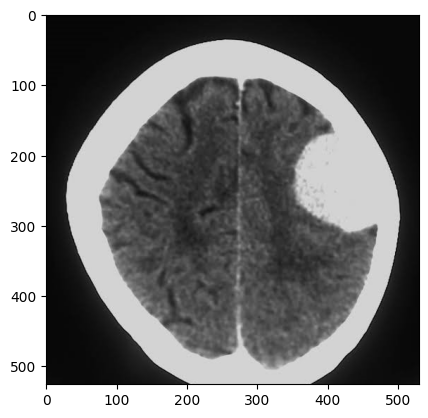

In [ ]:
img=image.load_img('/content/drive/MyDrive/main_project/Brain_tumor_detection/Testing/meningioma_tumor/image(113).jpg')
plt.imshow(img)
plt.show

Predict the model

1/1 [==============================] - 0s 127ms/step
Prediction:  Meningioma Tumor Detected


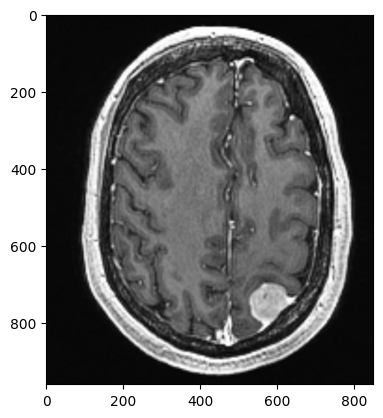

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from keras.models import load_model

# import h5py
model.save('brain_tumor_detection_model.h5')

# Load the saved model
model = load_model('brain_tumor_detection_model.h5')

# Define a function for brain tumor detection
def predict_tumor(image_path):
    # Load the image and convert it to a numpy array
    img = image.load_img(image_path, target_size=(150, 150,3))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.

    # Use the model to predict the class
    prediction = model.predict(np.expand_dims(img_array, axis=0))

    indices=prediction.argmax()


    # Return the predicted class (0 or 1) and its corresponding label
    if indices==0:
      return 0, "Glioma Tumor Detected"
    elif indices==1:
      return 1,'Meningioma Tumor Detected'
    elif indices==3:
      return 3,'Pituitary Tumor Detected'
    else:
        return 2, "Tumor Not Detected"

# Call the predict_tumor function and print the predicted class and label
image_path='/content/scan2_full_kucuk.png'
img1=image.load_img(image_path)
plt.imshow(img1)
plt.show
prediction, label = predict_tumor(image_path)
print("Prediction: ", label)


In [ ]:
# Evaluate the model on the test dataset
loss,accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print('Test Accuracy:', accuracy)

13/13 [==============================] - 0s 21ms/step - loss: 6.3751 - accuracy: 0.7766
Test Accuracy: 0.7766497731208801


Here a glioma tumor image from google is  provided for the prediction and it gives correct prediction